In [16]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr, chi2_contingency
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Libraries imported successfully!")

Libraries imported successfully!


In [17]:
# Load and Initial Data Exploration
df = pd.read_csv('education_districtwise.csv')

print("Dataset Shape:", df.shape)
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)

# Display basic information
print("\nColumn Information:")
print(df.info())

print("\nFirst 5 rows:")
display(df.head())

print("\nLast 5 rows:")
display(df.tail())

print("\nColumn Names:")
print(df.columns.tolist())

Dataset Shape: (680, 7)

DATASET OVERVIEW

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DISTNAME    680 non-null    object 
 1   STATNAME    680 non-null    object 
 2   BLOCKS      680 non-null    int64  
 3   VILLAGES    680 non-null    int64  
 4   CLUSTERS    680 non-null    int64  
 5   TOTPOPULAT  634 non-null    float64
 6   OVERALL_LI  634 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 37.3+ KB
None

First 5 rows:


,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00



Last 5 rows:


,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
675,DISTRICT522,STATE29,37,876,137,5296396.0,78.05
676,DISTRICT498,STATE29,64,1458,230,4042191.0,56.06
677,DISTRICT343,STATE29,59,1117,216,3483648.0,65.05
678,DISTRICT130,STATE29,51,993,211,3522644.0,66.16
679,DISTRICT341,STATE29,41,783,185,2798214.0,65.46



Column Names:
['DISTNAME', 'STATNAME', 'BLOCKS', 'VILLAGES', 'CLUSTERS', 'TOTPOPULAT', 'OVERALL_LI']


In [18]:
# Data Quality Assessment
print("="*50)
print("DATA QUALITY ANALYSIS")
print("="*50)

# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})
display(missing_df[missing_df['Missing Count'] > 0])

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Data types and unique values
print("\nData Types and Unique Values:")
for col in df.columns:
    print(f"{col}: {df[col].dtype}, Unique values: {df[col].nunique()}")

# Check for data consistency
print("\nData Consistency Checks:")
print(f"Unique Districts: {df['DISTNAME'].nunique()}")
print(f"Unique States: {df['STATNAME'].nunique()}")

# Display unique states
print(f"\nStates in dataset: {sorted(df['STATNAME'].unique())}")

DATA QUALITY ANALYSIS

Missing Values:


,Missing Count,Missing Percentage
TOTPOPULAT,46,6.764706
OVERALL_LI,46,6.764706



Duplicate rows: 0

Data Types and Unique Values:
DISTNAME: object, Unique values: 680
STATNAME: object, Unique values: 36
BLOCKS: int64, Unique values: 49
VILLAGES: int64, Unique values: 576
CLUSTERS: int64, Unique values: 267
TOTPOPULAT: float64, Unique values: 634
OVERALL_LI: float64, Unique values: 574

Data Consistency Checks:
Unique Districts: 680
Unique States: 36

States in dataset: ['STATE1', 'STATE10', 'STATE11', 'STATE12', 'STATE13', 'STATE14', 'STATE15', 'STATE16', 'STATE17', 'STATE18', 'STATE19', 'STATE2', 'STATE20', 'STATE21', 'STATE22', 'STATE23', 'STATE24', 'STATE25', 'STATE26', 'STATE27', 'STATE28', 'STATE29', 'STATE3', 'STATE30', 'STATE31', 'STATE32', 'STATE33', 'STATE34', 'STATE35', 'STATE36', 'STATE4', 'STATE5', 'STATE6', 'STATE7', 'STATE8', 'STATE9']


In [19]:
# Handle Missing Values
print("="*50)
print("MISSING VALUE HANDLING")
print("="*50)

# Before handling missing values
print("Before handling missing values:")
print(df.isnull().sum())

# Option 1: Remove rows with missing values (we'll use this approach)
# Since missing values are in TOTPOPULAT and OVERALL_LI (same rows), we'll drop them
df_clean = df.dropna().copy()

print(f"\nOriginal dataset shape: {df.shape}")
print(f"Clean dataset shape: {df_clean.shape}")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")

# Update df to use clean version for all subsequent analysis
df = df_clean.copy()

print("\nAfter handling missing values:")
print(df.isnull().sum())

print(f"\nFinal dataset for analysis: {df.shape[0]} districts")

MISSING VALUE HANDLING
Before handling missing values:
DISTNAME       0
STATNAME       0
BLOCKS         0
VILLAGES       0
CLUSTERS       0
TOTPOPULAT    46
OVERALL_LI    46
dtype: int64

Original dataset shape: (680, 7)
Clean dataset shape: (634, 7)
Rows removed: 46

After handling missing values:
DISTNAME      0
STATNAME      0
BLOCKS        0
VILLAGES      0
CLUSTERS      0
TOTPOPULAT    0
OVERALL_LI    0
dtype: int64

Final dataset for analysis: 634 districts


In [20]:
# Descriptive Statistics
print("="*50)
print("DESCRIPTIVE STATISTICS")
print("="*50)

# Basic descriptive statistics for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
print("\nNumerical Columns Descriptive Statistics:")
display(df[numerical_cols].describe())

# Additional statistical measures
print("\nAdditional Statistical Measures:")
stats_df = pd.DataFrame({
    'Skewness': df[numerical_cols].skew(),
    'Kurtosis': df[numerical_cols].kurtosis(),
    'Coefficient of Variation': (df[numerical_cols].std() / df[numerical_cols].mean()) * 100
})
display(stats_df)

# Categorical variable analysis
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"\nCategorical Columns: {list(categorical_cols)}")

for col in categorical_cols:
    print(f"\n{col} - Value Counts:")
    print(df[col].value_counts().head(10))

DESCRIPTIVE STATISTICS

Numerical Columns Descriptive Statistics:


,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
count,634.000000,634.000000,634.000000,6.340000e+02,634.000000
mean,11.118297,899.619874,124.610410,1.899024e+06,73.395189
std,9.799581,632.473675,95.821688,1.547475e+06,10.098460
min,1.000000,6.000000,1.000000,7.948000e+03,37.220000
25%,6.000000,396.750000,60.000000,8.226940e+05,66.437500
50%,8.000000,816.500000,105.000000,1.564392e+06,73.490000
75%,13.000000,1231.500000,167.000000,2.587520e+06,80.815000
max,66.000000,3963.000000,592.000000,1.105413e+07,98.760000



Additional Statistical Measures:


,Skewness,Kurtosis,Coefficient of Variation
BLOCKS,2.940116,10.563686,88.139235
VILLAGES,1.022044,1.783375,70.304547
CLUSTERS,1.668878,3.929559,76.897017
TOTPOPULAT,1.818797,5.644796,81.487930
OVERALL_LI,-0.157701,-0.108918,13.759022



Categorical Columns: ['DISTNAME', 'STATNAME']

DISTNAME - Value Counts:
DISTNAME
DISTRICT32     1
DISTRICT649    1
DISTRICT229    1
DISTRICT259    1
DISTRICT486    1
DISTRICT323    1
DISTRICT114    1
DISTRICT438    1
DISTRICT610    1
DISTRICT476    1
Name: count, dtype: int64

STATNAME - Value Counts:
STATNAME
STATE21    71
STATE22    50
STATE28    38
STATE17    35
STATE13    33
STATE6     30
STATE20    30
STATE33    27
STATE24    27
STATE9     26
Name: count, dtype: int64


DISTRIBUTION ANALYSIS


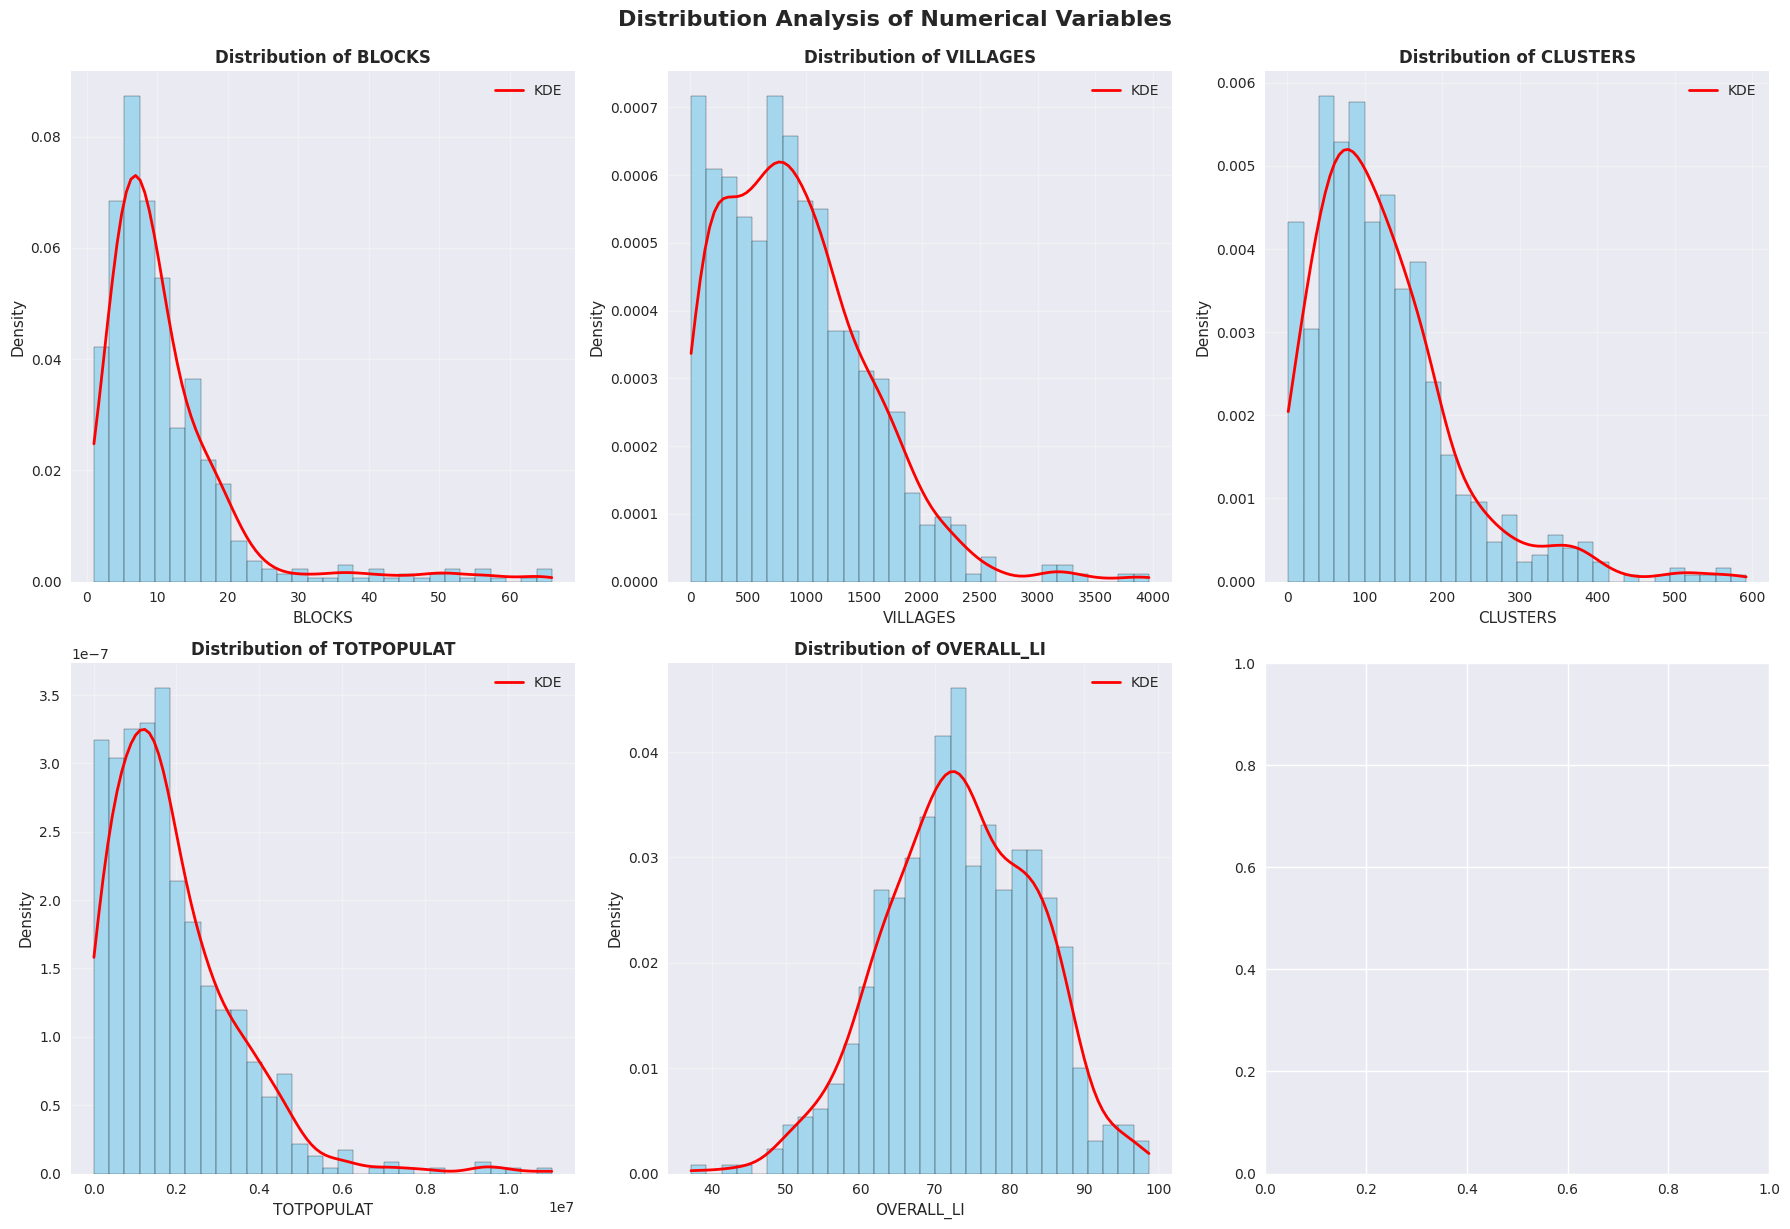

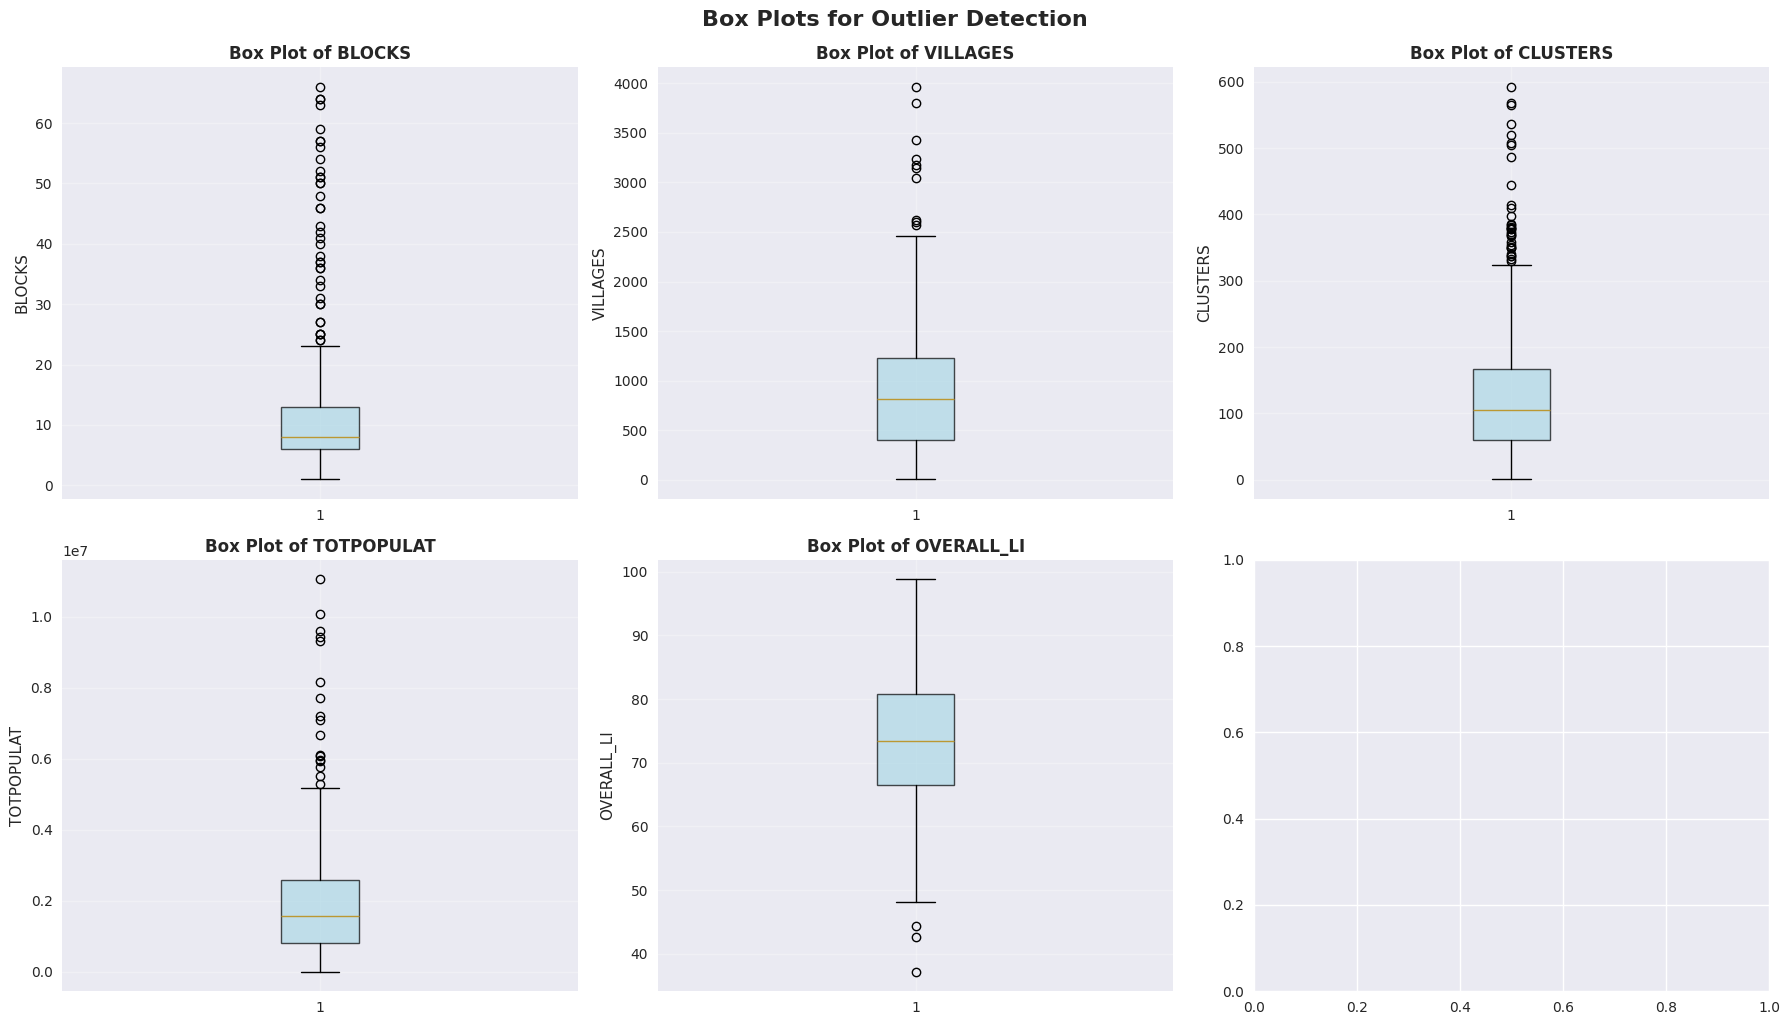

In [21]:
# Distribution Analysis with Advanced Visualizations
print("="*50)
print("DISTRIBUTION ANALYSIS")
print("="*50)

# Create subplots for distribution analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

numerical_cols_list = list(numerical_cols)

for i, col in enumerate(numerical_cols_list):
    # Histogram with KDE
    axes[i].hist(df[col], bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    
    # Add KDE curve
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(df[col].dropna())
    x_range = np.linspace(df[col].min(), df[col].max(), 100)
    axes[i].plot(x_range, kde(x_range), 'r-', linewidth=2, label='KDE')
    
    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Distribution Analysis of Numerical Variables', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Box plots for outlier detection
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols_list):
    box_plot = axes[i].boxplot(df[col].dropna(), patch_artist=True)
    box_plot['boxes'][0].set_facecolor('lightblue')
    box_plot['boxes'][0].set_alpha(0.7)
    
    axes[i].set_title(f'Box Plot of {col}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel(col)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Box Plots for Outlier Detection', fontsize=16, fontweight='bold', y=1.02)
plt.show()

STATISTICAL TESTS AND NORMALITY ASSESSMENT


,Variable,Shapiro-Wilk p-value,D'Agostino p-value,Jarque-Bera p-value,Is Normal (α=0.05)
0,BLOCKS,2.302321e-32,3.040024e-91,0.000000e+00,False
1,VILLAGES,7.401971e-16,3.395529e-24,2.391896e-42,False
2,CLUSTERS,1.634821e-22,2.828913e-48,4.267339e-151,False
3,TOTPOPULAT,5.157785e-23,1.335955e-56,1.404384e-255,False
4,OVERALL_LI,1.102847e-01,2.341711e-01,2.253473e-01,True


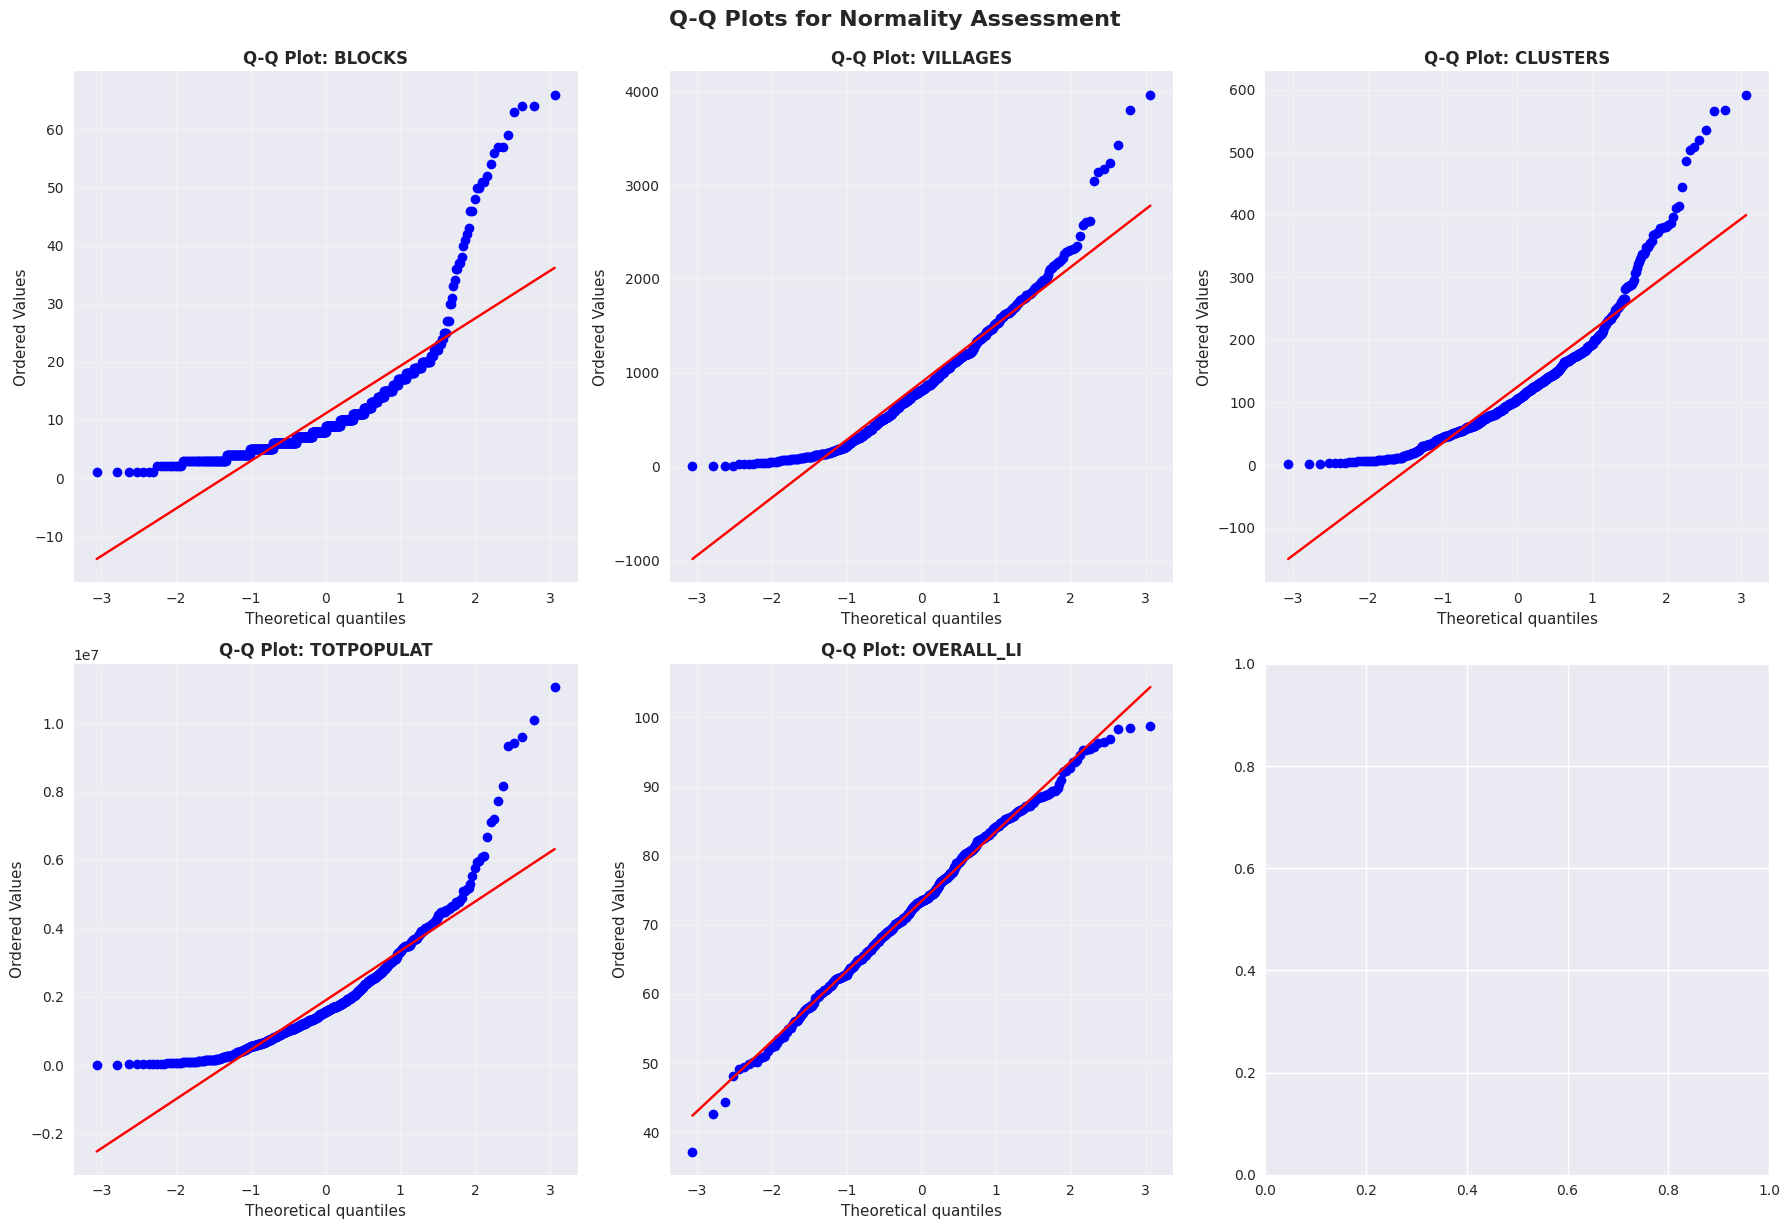

In [22]:
# Advanced Statistical Tests and Normality Assessment
print("="*50)
print("STATISTICAL TESTS AND NORMALITY ASSESSMENT")
print("="*50)

from scipy.stats import shapiro, normaltest, kstest, jarque_bera

# Normality tests for each numerical variable
normality_results = pd.DataFrame(columns=['Variable', 'Shapiro-Wilk p-value', 'D\'Agostino p-value', 
                                         'Jarque-Bera p-value', 'Is Normal (α=0.05)'])

for col in numerical_cols:
    # Shapiro-Wilk test (best for small samples)
    if len(df[col].dropna()) <= 5000:  # Shapiro-Wilk limitation
        shapiro_stat, shapiro_p = shapiro(df[col].dropna())
    else:
        shapiro_p = np.nan
    
    # D'Agostino's normality test
    dagostino_stat, dagostino_p = normaltest(df[col].dropna())
    
    # Jarque-Bera test
    jb_stat, jb_p = jarque_bera(df[col].dropna())
    
    # Determine if normal (using D'Agostino as primary test)
    is_normal = dagostino_p > 0.05
    
    normality_results = pd.concat([normality_results, pd.DataFrame({
        'Variable': [col],
        'Shapiro-Wilk p-value': [shapiro_p],
        'D\'Agostino p-value': [dagostino_p],
        'Jarque-Bera p-value': [jb_p],
        'Is Normal (α=0.05)': [is_normal]
    })], ignore_index=True)

display(normality_results)

# Q-Q plots for visual normality assessment
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols_list):
    stats.probplot(df[col].dropna(), dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot: {col}', fontsize=12, fontweight='bold')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Q-Q Plots for Normality Assessment', fontsize=16, fontweight='bold', y=1.02)
plt.show()

CORRELATION ANALYSIS


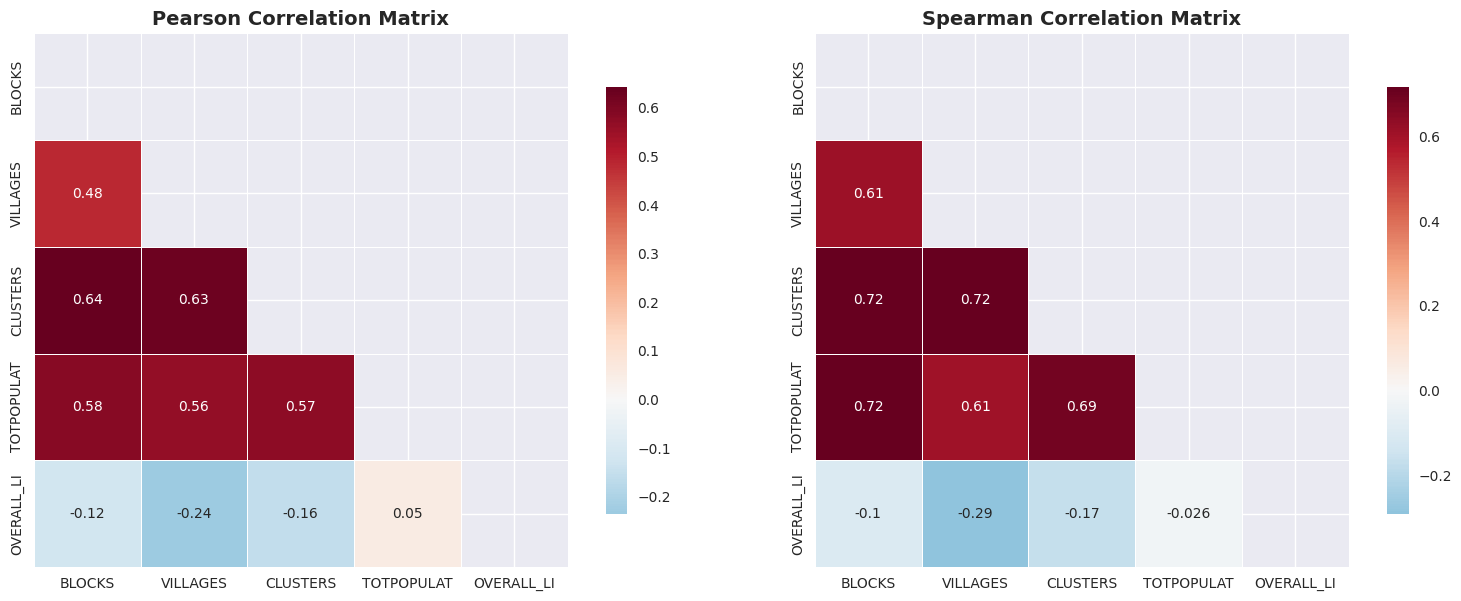


Strong Correlations (|r| > 0.7):
No strong correlations found.


In [23]:
# Correlation Analysis
print("="*50)
print("CORRELATION ANALYSIS")
print("="*50)

# Calculate correlation matrices
pearson_corr = df[numerical_cols].corr(method='pearson')
spearman_corr = df[numerical_cols].corr(method='spearman')

# Create correlation heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Pearson correlation heatmap
mask1 = np.triu(np.ones_like(pearson_corr, dtype=bool))
sns.heatmap(pearson_corr, mask=mask1, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax1)
ax1.set_title('Pearson Correlation Matrix', fontsize=14, fontweight='bold')

# Spearman correlation heatmap
mask2 = np.triu(np.ones_like(spearman_corr, dtype=bool))
sns.heatmap(spearman_corr, mask=mask2, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax2)
ax2.set_title('Spearman Correlation Matrix', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Detailed correlation analysis
print("\nStrong Correlations (|r| > 0.7):")
strong_corr = []
for i in range(len(pearson_corr.columns)):
    for j in range(i+1, len(pearson_corr.columns)):
        corr_val = pearson_corr.iloc[i, j]
        if abs(corr_val) > 0.7:
            strong_corr.append({
                'Variable 1': pearson_corr.columns[i],
                'Variable 2': pearson_corr.columns[j],
                'Pearson Correlation': corr_val,
                'Spearman Correlation': spearman_corr.iloc[i, j]
            })

if strong_corr:
    strong_corr_df = pd.DataFrame(strong_corr)
    display(strong_corr_df)
else:
    print("No strong correlations found.")

BIVARIATE ANALYSIS


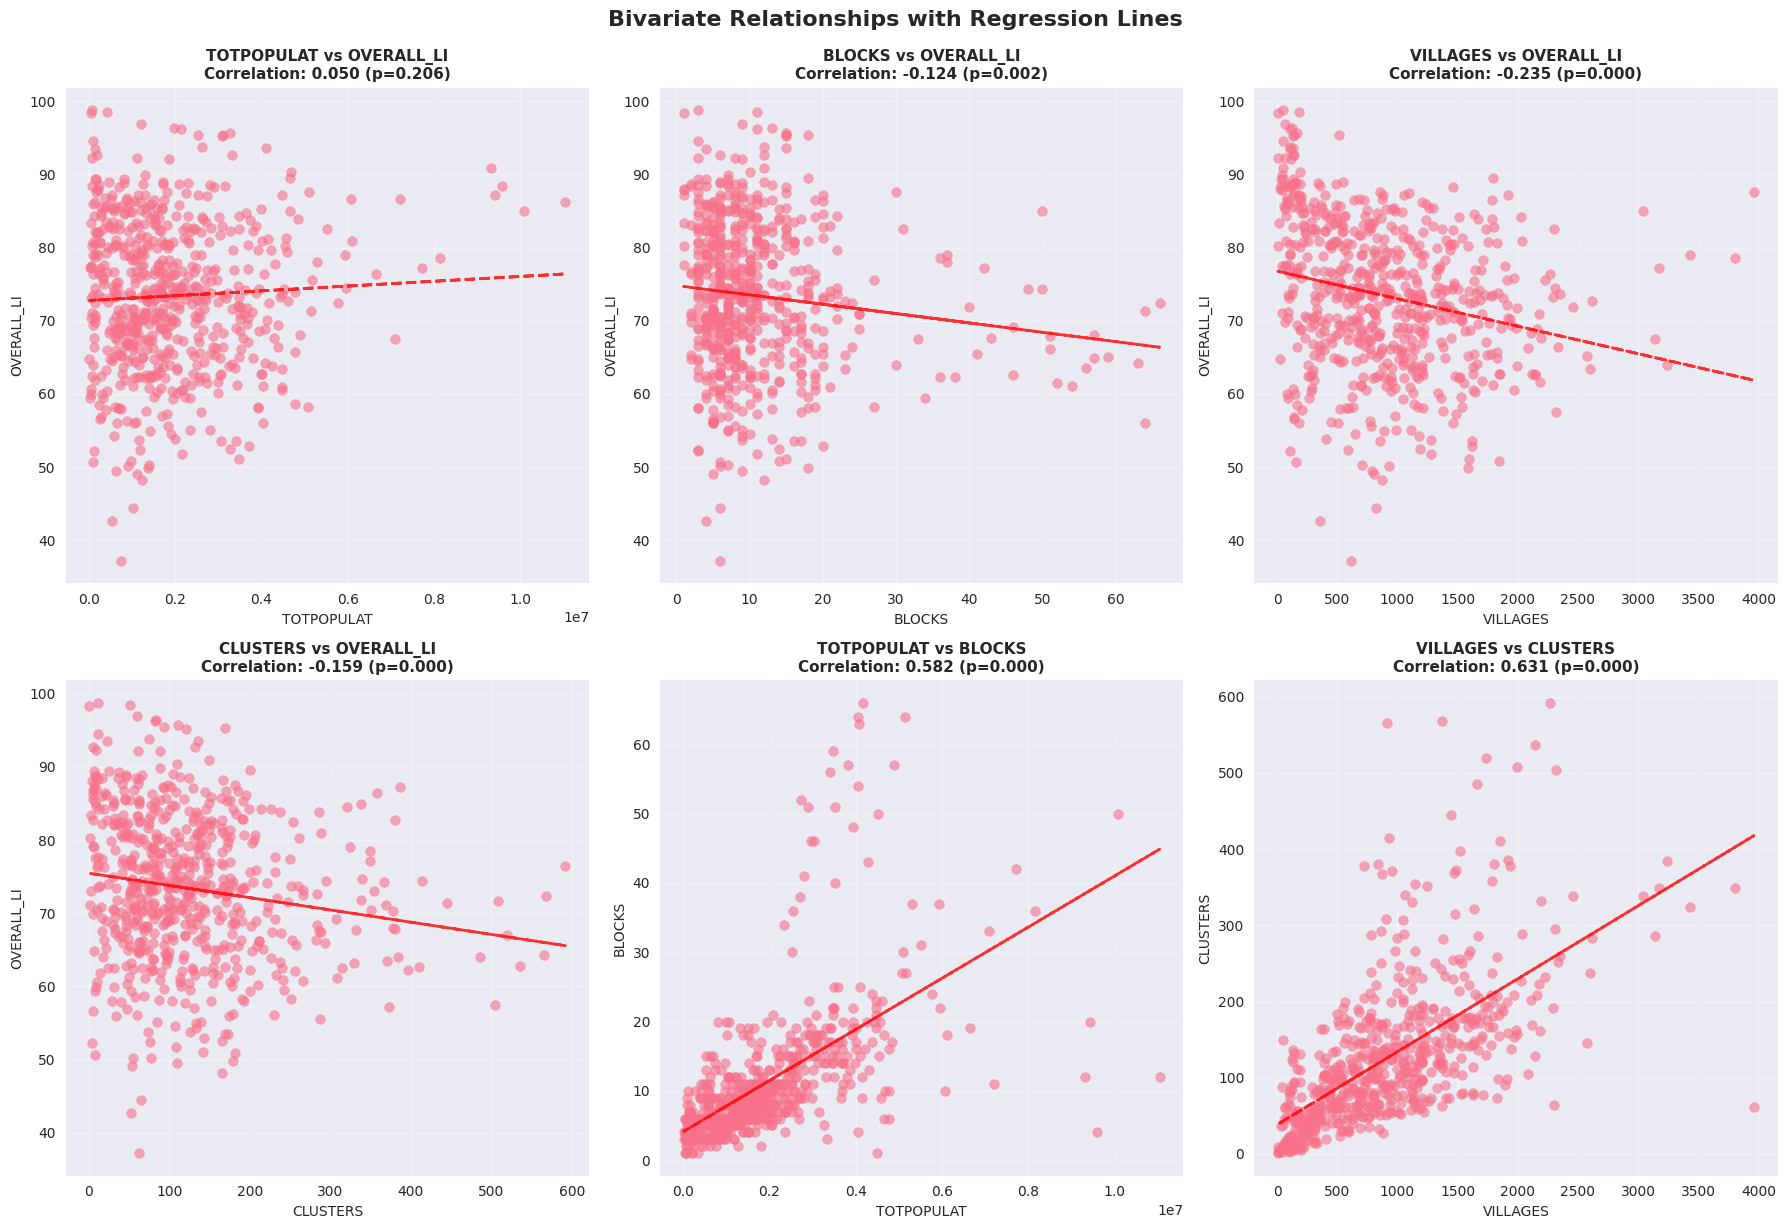


Correlation Significance Tests:
TOTPOPULAT vs OVERALL_LI: r=0.0503, p=0.2062 (Not Significant)
BLOCKS vs OVERALL_LI: r=-0.1240, p=0.0018 (Significant)
VILLAGES vs OVERALL_LI: r=-0.2354, p=0.0000 (Significant)
CLUSTERS vs OVERALL_LI: r=-0.1589, p=0.0001 (Significant)
TOTPOPULAT vs BLOCKS: r=0.5821, p=0.0000 (Significant)
VILLAGES vs CLUSTERS: r=0.6314, p=0.0000 (Significant)


In [24]:
# Advanced Bivariate Analysis
print("="*50)
print("BIVARIATE ANALYSIS")
print("="*50)

# Scatter plots with regression lines for key relationships
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Define key variable pairs for analysis
key_pairs = [
    ('TOTPOPULAT', 'OVERALL_LI'),
    ('BLOCKS', 'OVERALL_LI'),
    ('VILLAGES', 'OVERALL_LI'),
    ('CLUSTERS', 'OVERALL_LI'),
    ('TOTPOPULAT', 'BLOCKS'),
    ('VILLAGES', 'CLUSTERS')
]

for i, (x_var, y_var) in enumerate(key_pairs):
    # Scatter plot with regression line
    axes[i].scatter(df[x_var], df[y_var], alpha=0.6, s=50)
    
    # Add regression line
    z = np.polyfit(df[x_var], df[y_var], 1)
    p = np.poly1d(z)
    axes[i].plot(df[x_var], p(df[x_var]), "r--", alpha=0.8, linewidth=2)
    
    # Calculate correlation
    corr_coef, p_value = pearsonr(df[x_var], df[y_var])
    
    axes[i].set_xlabel(x_var, fontsize=10)
    axes[i].set_ylabel(y_var, fontsize=10)
    axes[i].set_title(f'{x_var} vs {y_var}\nCorrelation: {corr_coef:.3f} (p={p_value:.3f})', 
                     fontsize=11, fontweight='bold')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Bivariate Relationships with Regression Lines', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Statistical significance testing for correlations
print("\nCorrelation Significance Tests:")
for x_var, y_var in key_pairs:
    corr_coef, p_value = pearsonr(df[x_var], df[y_var])
    significance = "Significant" if p_value < 0.05 else "Not Significant"
    print(f"{x_var} vs {y_var}: r={corr_coef:.4f}, p={p_value:.4f} ({significance})")

STATE-WISE ANALYSIS
State-wise Summary Statistics:


,STATNAME,OVERALL_LI_mean,OVERALL_LI_median,OVERALL_LI_std,OVERALL_LI_min,OVERALL_LI_max,OVERALL_LI_count,TOTPOPULAT_mean,TOTPOPULAT_median,TOTPOPULAT_sum,BLOCKS_mean,BLOCKS_sum,VILLAGES_mean,VILLAGES_sum,CLUSTERS_mean,CLUSTERS_sum
0,STATE1,67.09,66.44,8.05,56.90,83.98,22,570405.73,449803.0,12548926.0,9.14,201,330.14,7263,74.00,1628
1,STATE10,85.71,85.71,3.32,83.36,88.06,2,121455.50,121455.5,242911.0,1.00,2,19.50,39,3.50,7
2,STATE11,83.41,84.25,5.54,77.50,88.49,3,126648.00,105539.0,379944.0,3.00,9,66.00,198,12.33,37
3,STATE12,89.44,91.46,10.39,66.41,98.76,8,136376.75,101600.5,1091014.0,4.50,36,106.38,851,21.12,169
4,STATE13,65.51,65.92,5.94,55.58,77.48,33,2079424.61,1830151.0,68621012.0,9.15,302,1255.79,41441,321.03,10594
5,STATE14,87.36,87.56,1.57,85.41,88.91,4,917758.00,784212.5,3671032.0,9.75,39,150.75,603,54.00,216
6,STATE15,80.29,81.06,3.91,74.44,85.24,13,778211.69,616409.0,10116752.0,7.31,95,922.23,11989,76.54,995
7,STATE16,82.68,83.68,4.58,73.19,89.01,12,571375.75,519950.5,6856509.0,10.33,124,843.33,10120,186.92,2243
8,STATE17,81.20,81.70,5.98,63.04,90.90,35,3210656.34,2588039.0,112372972.0,11.43,400,1218.71,42655,155.20,5432
9,STATE18,80.70,80.38,3.30,77.39,84.67,4,151922.00,141520.5,607688.0,7.25,29,189.00,756,27.75,111



Top 5 States by Average Literacy Rate:


,STATNAME,OVERALL_LI_mean,OVERALL_LI_count
31,STATE5,93.65,14
10,STATE19,92.28,1
3,STATE12,89.44,8
25,STATE32,88.14,4
5,STATE14,87.36,4



Bottom 5 States by Average Literacy Rate:


,STATNAME,OVERALL_LI_mean,OVERALL_LI_count
20,STATE28,63.78,38
22,STATE3,65.33,16
4,STATE13,65.51,33
15,STATE23,65.89,24
21,STATE29,66.29,10


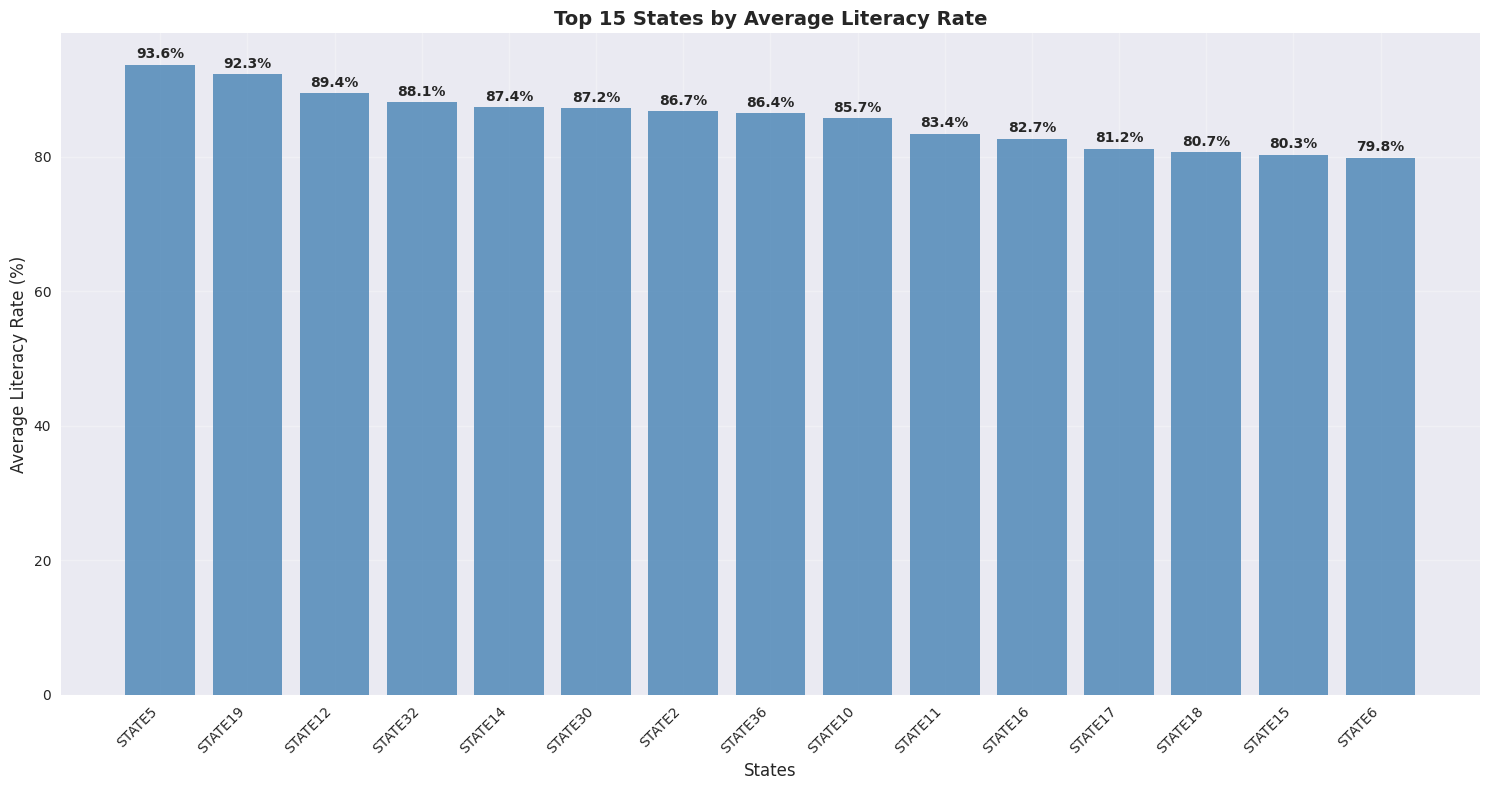

In [25]:
# State-wise Analysis
print("="*50)
print("STATE-WISE ANALYSIS")
print("="*50)

# Group by state for analysis
state_stats = df.groupby('STATNAME').agg({
    'OVERALL_LI': ['mean', 'median', 'std', 'min', 'max', 'count'],
    'TOTPOPULAT': ['mean', 'median', 'sum'],
    'BLOCKS': ['mean', 'sum'],
    'VILLAGES': ['mean', 'sum'],
    'CLUSTERS': ['mean', 'sum']
}).round(2)

# Flatten column names
state_stats.columns = [f'{col[0]}_{col[1]}' for col in state_stats.columns]
state_stats = state_stats.reset_index()

print("State-wise Summary Statistics:")
display(state_stats.head(10))

# Top and bottom performing states by literacy
print(f"\nTop 5 States by Average Literacy Rate:")
top_literacy = state_stats.nlargest(5, 'OVERALL_LI_mean')[['STATNAME', 'OVERALL_LI_mean', 'OVERALL_LI_count']]
display(top_literacy)

print(f"\nBottom 5 States by Average Literacy Rate:")
bottom_literacy = state_stats.nsmallest(5, 'OVERALL_LI_mean')[['STATNAME', 'OVERALL_LI_mean', 'OVERALL_LI_count']]
display(bottom_literacy)

# Visualize state-wise literacy distribution
plt.figure(figsize=(15, 8))
state_literacy = df.groupby('STATNAME')['OVERALL_LI'].mean().sort_values(ascending=False)

# Select top 15 states for better visualization
top_15_states = state_literacy.head(15)
plt.bar(range(len(top_15_states)), top_15_states.values, color='steelblue', alpha=0.8)
plt.xlabel('States', fontsize=12)
plt.ylabel('Average Literacy Rate (%)', fontsize=12)
plt.title('Top 15 States by Average Literacy Rate', fontsize=14, fontweight='bold')
plt.xticks(range(len(top_15_states)), top_15_states.index, rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, v in enumerate(top_15_states.values):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## Feature Engineering

Feature engineering is crucial for extracting meaningful insights from our education dataset. We'll create new features that capture important relationships and patterns in the data.

In [26]:
# Feature Engineering
print("="*50)
print("FEATURE ENGINEERING")
print("="*50)

# Create a copy of the dataframe for feature engineering
df_engineered = df.copy()

# 1. Population Density Features
df_engineered['POPULATION_PER_BLOCK'] = df_engineered['TOTPOPULAT'] / df_engineered['BLOCKS']
df_engineered['POPULATION_PER_VILLAGE'] = df_engineered['TOTPOPULAT'] / df_engineered['VILLAGES']
df_engineered['POPULATION_PER_CLUSTER'] = df_engineered['TOTPOPULAT'] / df_engineered['CLUSTERS']

# 2. Infrastructure Efficiency Features
df_engineered['VILLAGES_PER_BLOCK'] = df_engineered['VILLAGES'] / df_engineered['BLOCKS']
df_engineered['CLUSTERS_PER_BLOCK'] = df_engineered['CLUSTERS'] / df_engineered['BLOCKS']
df_engineered['VILLAGES_PER_CLUSTER'] = df_engineered['VILLAGES'] / df_engineered['CLUSTERS']

# 3. Administrative Coverage Features
df_engineered['BLOCK_COVERAGE_RATIO'] = df_engineered['BLOCKS'] / df_engineered['TOTPOPULAT'] * 100000  # per 100k population
df_engineered['CLUSTER_COVERAGE_RATIO'] = df_engineered['CLUSTERS'] / df_engineered['TOTPOPULAT'] * 100000

# 4. Literacy Categories
def categorize_literacy(literacy_rate):
    if literacy_rate >= 80:
        return 'Very High'
    elif literacy_rate >= 70:
        return 'High'
    elif literacy_rate >= 60:
        return 'Medium'
    elif literacy_rate >= 50:
        return 'Low'
    else:
        return 'Very Low'

df_engineered['LITERACY_CATEGORY'] = df_engineered['OVERALL_LI'].apply(categorize_literacy)

# 5. Population Size Categories
def categorize_population(population):
    if population >= 2000000:
        return 'Very Large'
    elif population >= 1000000:
        return 'Large'
    elif population >= 500000:
        return 'Medium'
    elif population >= 100000:
        return 'Small'
    else:
        return 'Very Small'

df_engineered['POPULATION_CATEGORY'] = df_engineered['TOTPOPULAT'].apply(categorize_population)

# 6. Educational Infrastructure Index (composite score)
# Normalize components and create weighted index
scaler = MinMaxScaler()
infrastructure_components = ['BLOCKS', 'VILLAGES', 'CLUSTERS']
normalized_infra = scaler.fit_transform(df_engineered[infrastructure_components])

# Create weighted infrastructure index (equal weights for simplicity)
df_engineered['INFRASTRUCTURE_INDEX'] = np.mean(normalized_infra, axis=1) * 100

print("New Features Created:")
new_features = [col for col in df_engineered.columns if col not in df.columns]
for feature in new_features:
    print(f"- {feature}")

print(f"\nTotal features: {len(df_engineered.columns)} (added {len(new_features)} new features)")

# Display sample of engineered features
print("\nSample of Engineered Features:")
display(df_engineered[new_features].head())

FEATURE ENGINEERING
New Features Created:
- POPULATION_PER_BLOCK
- POPULATION_PER_VILLAGE
- POPULATION_PER_CLUSTER
- VILLAGES_PER_BLOCK
- CLUSTERS_PER_BLOCK
- VILLAGES_PER_CLUSTER
- BLOCK_COVERAGE_RATIO
- CLUSTER_COVERAGE_RATIO
- LITERACY_CATEGORY
- POPULATION_CATEGORY
- INFRASTRUCTURE_INDEX

Total features: 18 (added 11 new features)

Sample of Engineered Features:


,POPULATION_PER_BLOCK,POPULATION_PER_VILLAGE,POPULATION_PER_CLUSTER,VILLAGES_PER_BLOCK,CLUSTERS_PER_BLOCK,VILLAGES_PER_CLUSTER,BLOCK_COVERAGE_RATIO,CLUSTER_COVERAGE_RATIO,LITERACY_CATEGORY,POPULATION_CATEGORY,INFRASTRUCTURE_INDEX
0,67351.076923,2239.294118,8418.884615,30.076923,8.000,3.759615,1.484757,11.878058,Medium,Medium,15.206407
1,56416.833333,1497.792035,7052.104167,37.666667,8.000,4.708333,1.772521,14.180165,Medium,Large,22.444229
2,158718.875000,13507.989362,19534.630769,11.750000,8.125,1.446154,0.630045,5.119114,High,Large,7.940747
3,56596.384615,1406.793499,7074.548077,40.230769,8.000,5.028846,1.766897,14.135179,Low,Medium,16.318360
4,71257.500000,1587.910864,8907.187500,44.875000,8.000,5.609375,1.403361,11.226888,Medium,Medium,10.116676


ANALYSIS OF ENGINEERED FEATURES
Correlation of New Features with Literacy Rate:


,correlation,p_value,significance
POPULATION_PER_VILLAGE,0.248052,0.0,Significant
VILLAGES_PER_BLOCK,-0.241495,0.0,Significant
INFRASTRUCTURE_INDEX,-0.203858,0.0,Significant
POPULATION_PER_CLUSTER,0.197045,0.000001,Significant
VILLAGES_PER_CLUSTER,-0.119249,0.002635,Significant
POPULATION_PER_BLOCK,0.119039,0.002681,Significant
CLUSTERS_PER_BLOCK,-0.103554,0.009073,Significant
BLOCK_COVERAGE_RATIO,-0.050733,0.202053,Not Significant
CLUSTER_COVERAGE_RATIO,-0.050361,0.205384,Not Significant


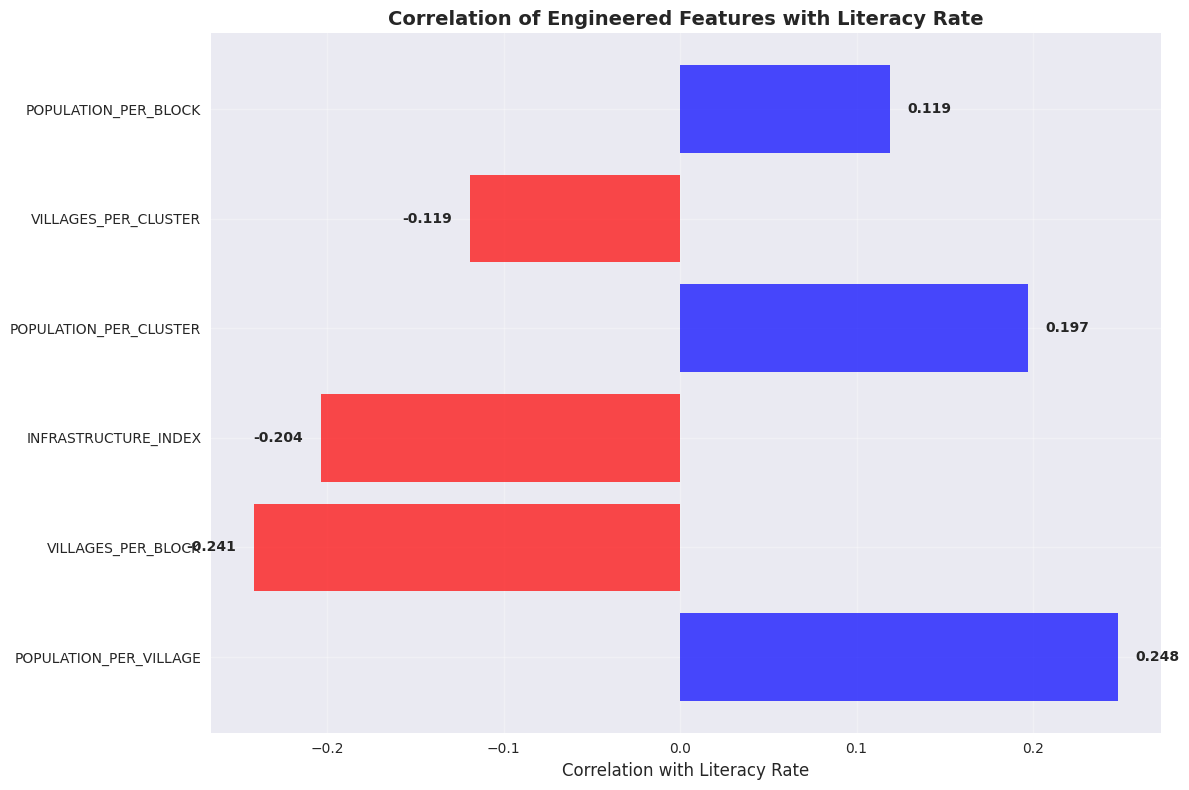

In [27]:
# Advanced Analysis of Engineered Features
print("="*50)
print("ANALYSIS OF ENGINEERED FEATURES")
print("="*50)

# Correlation between new features and literacy rate
new_numerical_features = [col for col in new_features if df_engineered[col].dtype in ['float64', 'int64']]

correlations_with_literacy = {}
for feature in new_numerical_features:
    correlation, p_value = pearsonr(df_engineered[feature], df_engineered['OVERALL_LI'])
    correlations_with_literacy[feature] = {
        'correlation': correlation,
        'p_value': p_value,
        'significance': 'Significant' if p_value < 0.05 else 'Not Significant'
    }

# Create DataFrame for better visualization
corr_df = pd.DataFrame(correlations_with_literacy).T
corr_df = corr_df.sort_values('correlation', key=abs, ascending=False)

print("Correlation of New Features with Literacy Rate:")
display(corr_df)

# Visualize top correlations
top_correlations = corr_df.head(6)
plt.figure(figsize=(12, 8))
colors = ['red' if x < 0 else 'blue' for x in top_correlations['correlation']]
bars = plt.barh(range(len(top_correlations)), top_correlations['correlation'], color=colors, alpha=0.7)
plt.yticks(range(len(top_correlations)), top_correlations.index, fontsize=10)
plt.xlabel('Correlation with Literacy Rate', fontsize=12)
plt.title('Correlation of Engineered Features with Literacy Rate', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add correlation values on bars
for i, (bar, corr) in enumerate(zip(bars, top_correlations['correlation'])):
    plt.text(corr + (0.01 if corr > 0 else -0.01), i, f'{corr:.3f}', 
             ha='left' if corr > 0 else 'right', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

PRINCIPAL COMPONENT ANALYSIS


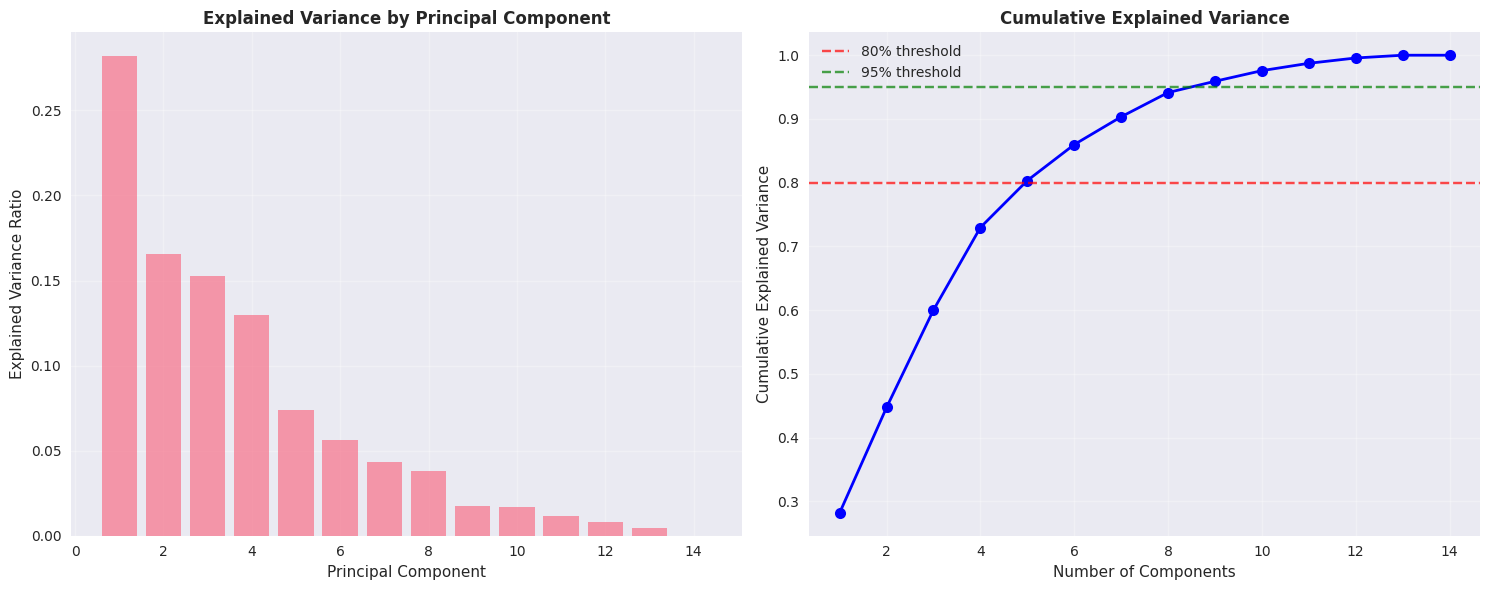

Components needed for 80% variance: 5
Components needed for 95% variance: 9

Feature Loadings for First 3 Components:


,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,POPULATION_PER_BLOCK,POPULATION_PER_VILLAGE,POPULATION_PER_CLUSTER,VILLAGES_PER_BLOCK,CLUSTERS_PER_BLOCK,VILLAGES_PER_CLUSTER,BLOCK_COVERAGE_RATIO,CLUSTER_COVERAGE_RATIO,INFRASTRUCTURE_INDEX
PC1,0.367,0.421,0.446,0.386,-0.110,0.080,-0.017,-0.051,0.118,0.156,-0.047,-0.189,-0.094,0.484
PC2,0.039,0.081,0.139,-0.290,-0.273,-0.376,-0.377,-0.444,0.073,0.077,-0.103,0.319,0.446,0.103
PC3,-0.386,0.125,-0.067,-0.136,-0.157,0.267,-0.181,-0.073,0.599,0.443,0.202,-0.250,-0.074,-0.122


In [28]:
# Principal Component Analysis (PCA)
print("="*50)
print("PRINCIPAL COMPONENT ANALYSIS")
print("="*50)

# Select numerical features for PCA
pca_features = ['BLOCKS', 'VILLAGES', 'CLUSTERS', 'TOTPOPULAT', 'OVERALL_LI'] + new_numerical_features
pca_data = df_engineered[pca_features].copy()

# Standardize the features
scaler = StandardScaler()
pca_scaled = scaler.fit_transform(pca_data)

# Perform PCA
pca = PCA()
pca_transformed = pca.fit_transform(pca_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Individual explained variance
ax1.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Explained Variance by Principal Component', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Cumulative explained variance
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-', linewidth=2, markersize=8)
ax2.axhline(y=0.8, color='r', linestyle='--', alpha=0.7, label='80% threshold')
ax2.axhline(y=0.95, color='g', linestyle='--', alpha=0.7, label='95% threshold')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Components needed for 80% and 95% variance
components_80 = np.argmax(cumulative_variance >= 0.8) + 1
components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Components needed for 80% variance: {components_80}")
print(f"Components needed for 95% variance: {components_95}")

# Feature importance in first few components
n_components_show = min(3, len(pca_features))
component_matrix = pd.DataFrame(
    pca.components_[:n_components_show],
    columns=pca_features,
    index=[f'PC{i+1}' for i in range(n_components_show)]
)

print(f"\nFeature Loadings for First {n_components_show} Components:")
display(component_matrix.round(3))

CLUSTERING ANALYSIS


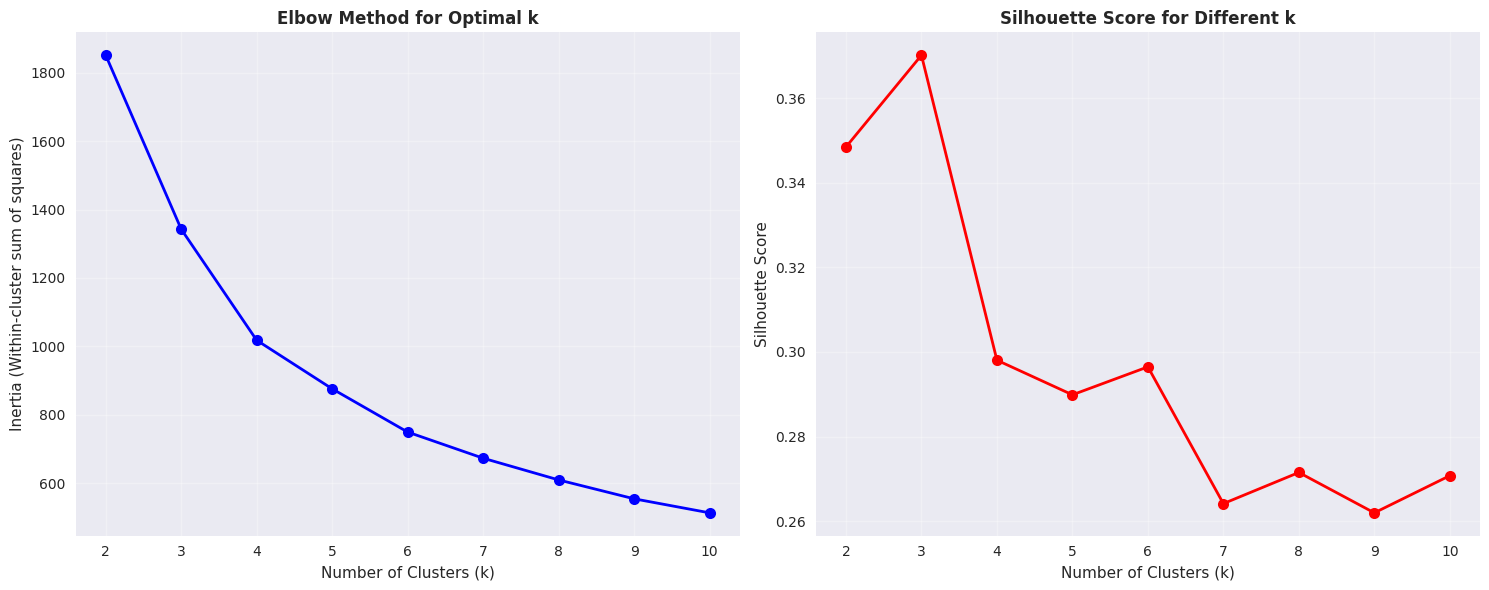

Optimal number of clusters: 3 (Silhouette Score: 0.370)

Cluster Analysis:


,OVERALL_LI_mean,OVERALL_LI_std,OVERALL_LI_count,TOTPOPULAT_mean,TOTPOPULAT_median,INFRASTRUCTURE_INDEX_mean,POPULATION_PER_CLUSTER_mean,LITERACY_CATEGORY_mode
CLUSTER,,,,,,,,
0,86.61,2.07,9,3365690.33,2531583.0,5.60,263651.23,Very High
1,74.23,10.22,446,1190942.11,1136694.0,13.52,16003.64,High
2,70.66,9.12,179,3589552.56,3419622.0,35.78,19059.42,Medium


In [29]:
# Clustering Analysis
print("="*50)
print("CLUSTERING ANALYSIS")
print("="*50)

# Select features for clustering
clustering_features = ['OVERALL_LI', 'TOTPOPULAT', 'INFRASTRUCTURE_INDEX', 'POPULATION_PER_CLUSTER']
cluster_data = df_engineered[clustering_features].copy()

# Standardize features for clustering
scaler_cluster = StandardScaler()
cluster_scaled = scaler_cluster.fit_transform(cluster_data)

# Determine optimal number of clusters using elbow method and silhouette score
K_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(cluster_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(cluster_scaled, kmeans.labels_))

# Plot elbow curve and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Elbow curve
ax1.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (Within-cluster sum of squares)')
ax1.set_title('Elbow Method for Optimal k', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Silhouette scores
ax2.plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score for Different k', fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Choose optimal k (highest silhouette score)
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k} (Silhouette Score: {max(silhouette_scores):.3f})")

# Perform clustering with optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_optimal.fit_predict(cluster_scaled)

# Add cluster labels to dataframe
df_engineered['CLUSTER'] = cluster_labels

# Analyze clusters
cluster_analysis = df_engineered.groupby('CLUSTER')[clustering_features + ['LITERACY_CATEGORY']].agg({
    'OVERALL_LI': ['mean', 'std', 'count'],
    'TOTPOPULAT': ['mean', 'median'],
    'INFRASTRUCTURE_INDEX': ['mean'],
    'POPULATION_PER_CLUSTER': ['mean'],
    'LITERACY_CATEGORY': lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown'
}).round(2)

cluster_analysis.columns = [f'{col[0]}_{col[1]}' if col[1] != '<lambda>' else f'{col[0]}_mode' for col in cluster_analysis.columns]

print("\nCluster Analysis:")
display(cluster_analysis)

## Key Insights and Interpretations

Based on our comprehensive exploratory data analysis and feature engineering, we can draw several important conclusions about the education district dataset.

In [30]:
# Summary of Key Insights
print("="*50)
print("KEY INSIGHTS SUMMARY")
print("="*50)

# 1. Dataset Overview Insights
print("1. DATASET OVERVIEW:")
print(f"   • Total districts analyzed: {len(df)}")
print(f"   • States covered: {df['STATNAME'].nunique()}")
print(f"   • Literacy rate range: {df['OVERALL_LI'].min():.1f}% - {df['OVERALL_LI'].max():.1f}%")
print(f"   • Average literacy rate: {df['OVERALL_LI'].mean():.1f}%")

# 2. Distribution Insights
print("\n2. DISTRIBUTION INSIGHTS:")
literacy_categories = df_engineered['LITERACY_CATEGORY'].value_counts()
print("   • Literacy Distribution:")
for category, count in literacy_categories.items():
    percentage = (count / len(df_engineered)) * 100
    print(f"     - {category}: {count} districts ({percentage:.1f}%)")

# 3. Correlation Insights
print("\n3. CORRELATION INSIGHTS:")
corr_literacy_pop = pearsonr(df['TOTPOPULAT'], df['OVERALL_LI'])[0]
print(f"   • Population vs Literacy correlation: {corr_literacy_pop:.3f}")

strongest_corr = corr_df.iloc[0]
print(f"   • Strongest engineered feature correlation with literacy: {strongest_corr.name} ({strongest_corr['correlation']:.3f})")

# 4. State Performance Insights
print("\n4. STATE PERFORMANCE INSIGHTS:")
best_state = state_stats.loc[state_stats['OVERALL_LI_mean'].idxmax()]
worst_state = state_stats.loc[state_stats['OVERALL_LI_mean'].idxmin()]
print(f"   • Best performing state: {best_state['STATNAME']} ({best_state['OVERALL_LI_mean']:.1f}% avg literacy)")
print(f"   • Lowest performing state: {worst_state['STATNAME']} ({worst_state['OVERALL_LI_mean']:.1f}% avg literacy)")

# 5. Infrastructure Insights
print("\n5. INFRASTRUCTURE INSIGHTS:")
avg_pop_per_cluster = df_engineered['POPULATION_PER_CLUSTER'].mean()
avg_villages_per_block = df_engineered['VILLAGES_PER_BLOCK'].mean()
print(f"   • Average population per educational cluster: {avg_pop_per_cluster:,.0f}")
print(f"   • Average villages per administrative block: {avg_villages_per_block:.1f}")

# 6. Clustering Insights
print("\n6. CLUSTERING INSIGHTS:")
print(f"   • Optimal number of district clusters: {optimal_k}")
print(f"   • Silhouette score: {max(silhouette_scores):.3f}")
for i in range(optimal_k):
    cluster_size = (df_engineered['CLUSTER'] == i).sum()
    cluster_literacy = df_engineered[df_engineered['CLUSTER'] == i]['OVERALL_LI'].mean()
    print(f"   • Cluster {i}: {cluster_size} districts, avg literacy {cluster_literacy:.1f}%")

# 7. Feature Engineering Insights
print("\n7. FEATURE ENGINEERING INSIGHTS:")
print(f"   • Created {len(new_features)} new features")
print(f"   • Most predictive new feature: {corr_df.index[0]} (r={corr_df.iloc[0]['correlation']:.3f})")

# 8. Data Quality Insights
print("\n8. DATA QUALITY:")
print(f"   • Missing values: {df.isnull().sum().sum()} (dataset is complete)")
print(f"   • Duplicate records: {df.duplicated().sum()}")
print(f"   • Data quality: {'Excellent' if df.isnull().sum().sum() == 0 and df.duplicated().sum() == 0 else 'Good'}")

print("\n" + "="*50)

KEY INSIGHTS SUMMARY
1. DATASET OVERVIEW:
   • Total districts analyzed: 634
   • States covered: 36
   • Literacy rate range: 37.2% - 98.8%
   • Average literacy rate: 73.4%

2. DISTRIBUTION INSIGHTS:
   • Literacy Distribution:
     - High: 225 districts (35.5%)
     - Very High: 180 districts (28.4%)
     - Medium: 173 districts (27.3%)
     - Low: 49 districts (7.7%)
     - Very Low: 7 districts (1.1%)

3. CORRELATION INSIGHTS:
   • Population vs Literacy correlation: 0.050
   • Strongest engineered feature correlation with literacy: POPULATION_PER_VILLAGE (0.248)

4. STATE PERFORMANCE INSIGHTS:
   • Best performing state: STATE5 (93.7% avg literacy)
   • Lowest performing state: STATE28 (63.8% avg literacy)

5. INFRASTRUCTURE INSIGHTS:
   • Average population per educational cluster: 20,382
   • Average villages per administrative block: 95.4

6. CLUSTERING INSIGHTS:
   • Optimal number of district clusters: 3
   • Silhouette score: 0.370
   • Cluster 0: 9 districts, avg literacy 